In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [100]:
df = pd.read_csv('data.csv')
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

# EDA

---



In [101]:
print(f'{df.shape[0]} rows, {df.shape[1]} columns')
print(f'{df.diagnosis.value_counts()}\n')
df.sample(3)

569 rows, 31 columns
B    357
M    212
Name: diagnosis, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
463,B,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.1860,0.08288,0.3210,0.07863
136,B,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,...,13.33,25.48,86.16,546.7,0.1271,0.1028,0.1046,0.06968,0.1712,0.07343
88,B,12.36,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,0.1930,...,13.83,30.50,91.46,574.7,0.1304,0.2463,0.2434,0.12050,0.2972,0.09261


Этот набор данных содержит информацию о 569 пациентах, у которых была диагностирована опухоль молочной железы. Каждый пациент характеризуется 30 признаками, такими как радиус, текстура, гладкость, компактность и т.д. Целевая переменная diagnosis показывает, является ли опухоль злокачественной (M) или доброкачественной (B).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


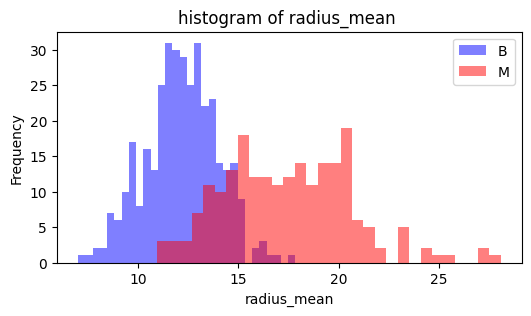

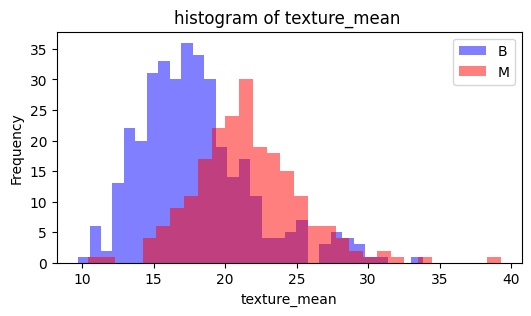

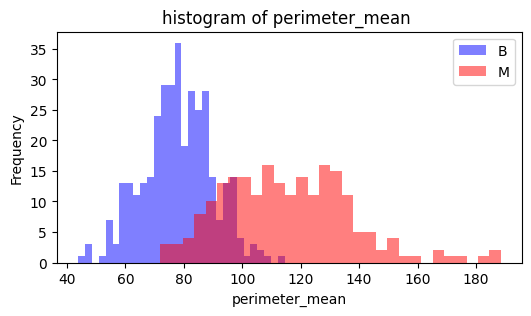

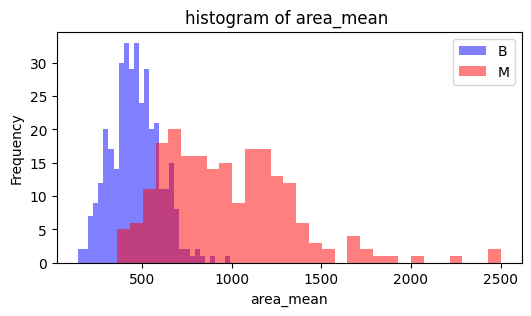

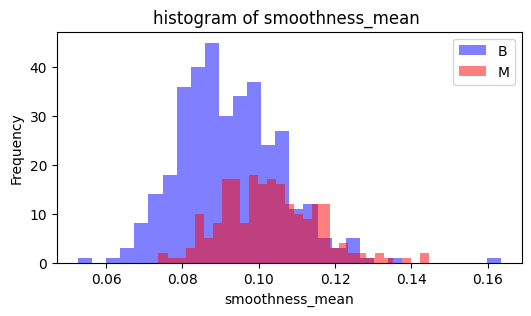

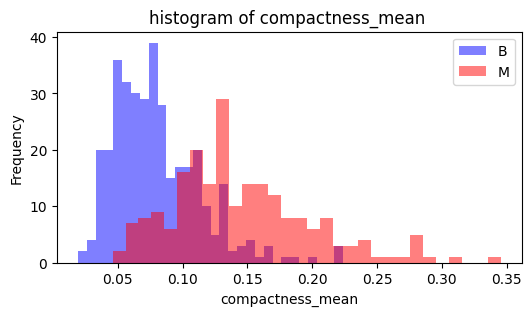

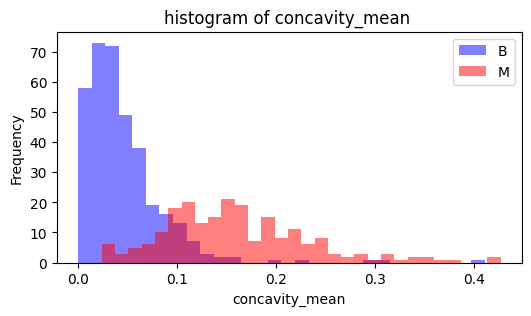

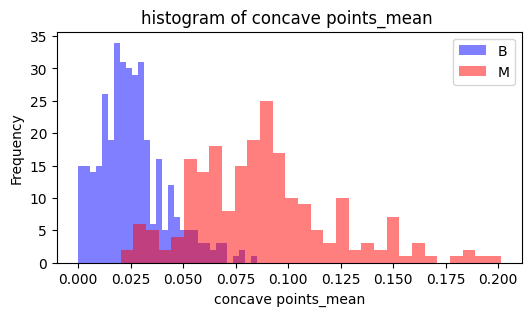

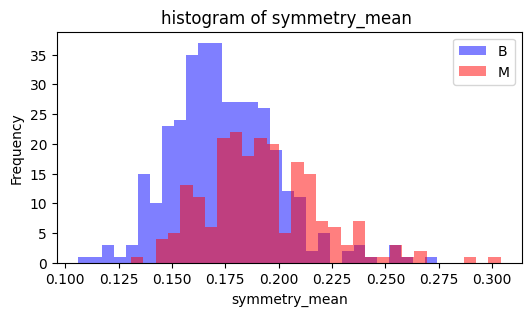

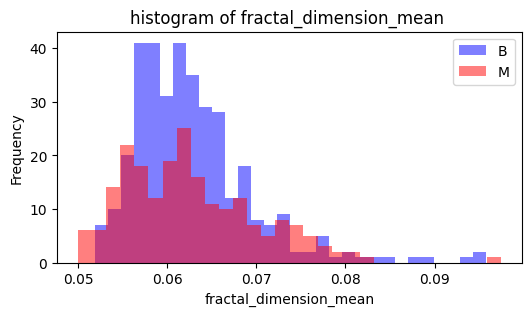

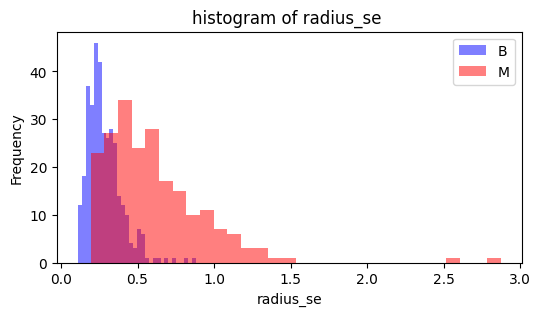

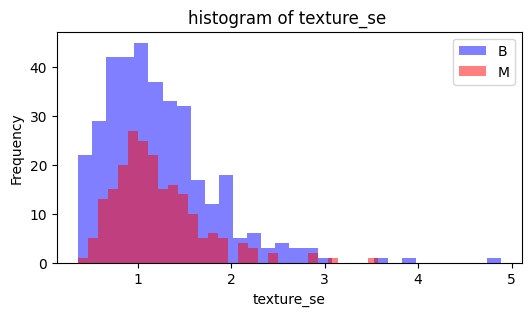

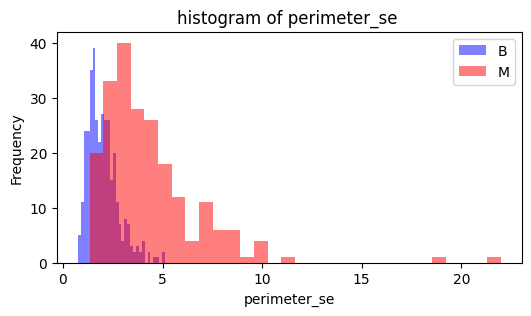

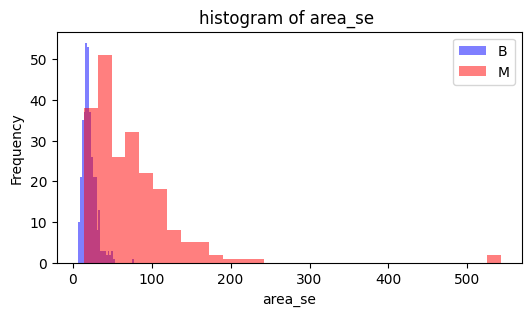

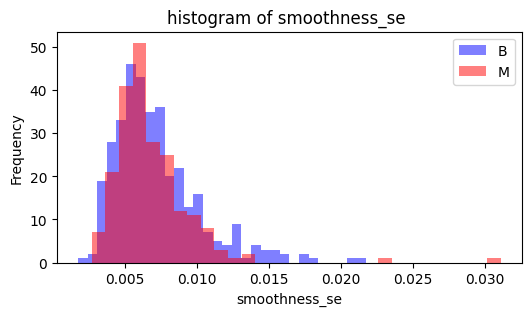

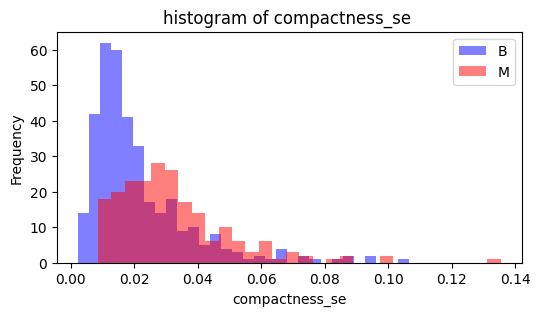

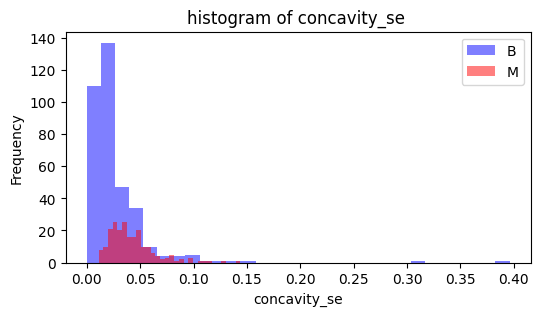

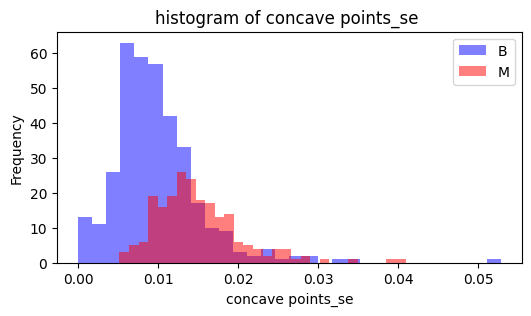

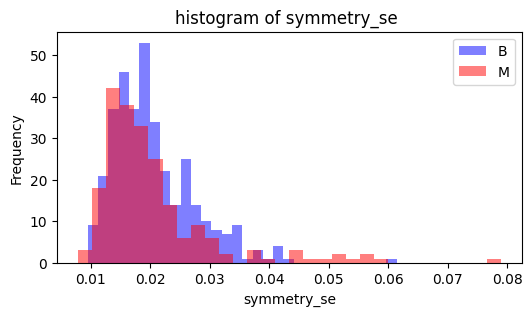

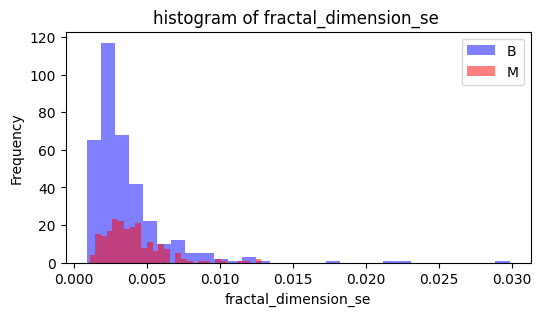

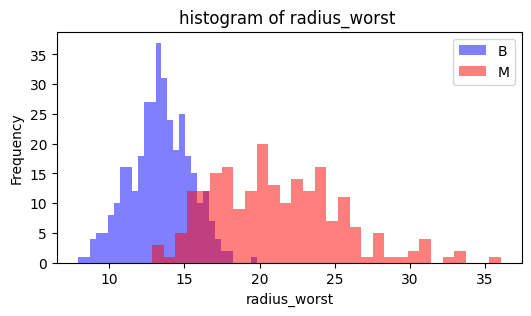

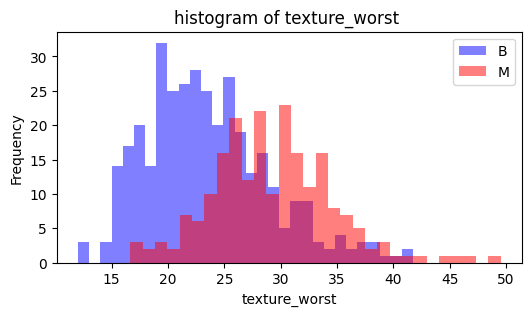

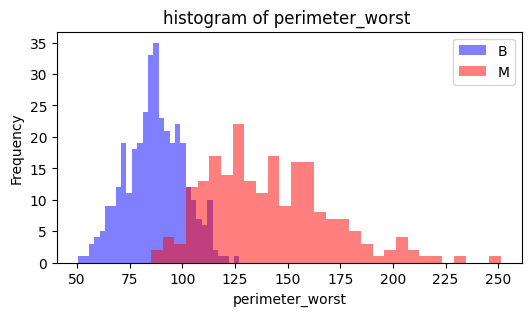

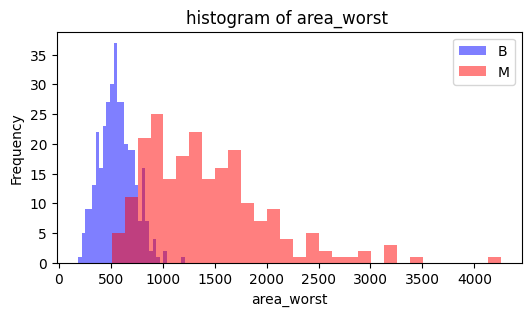

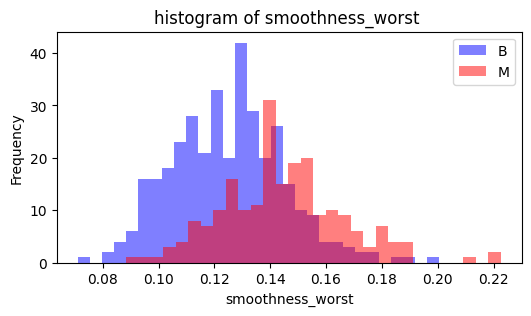

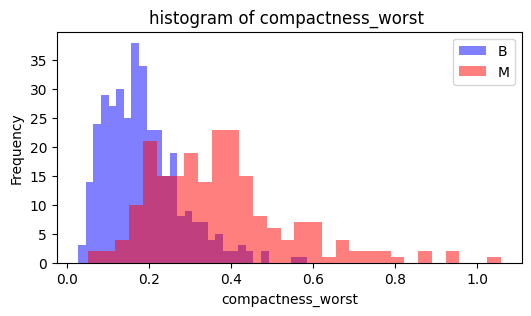

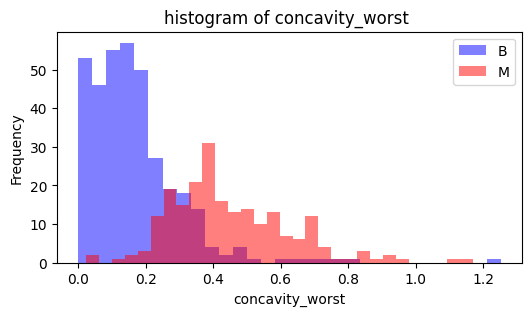

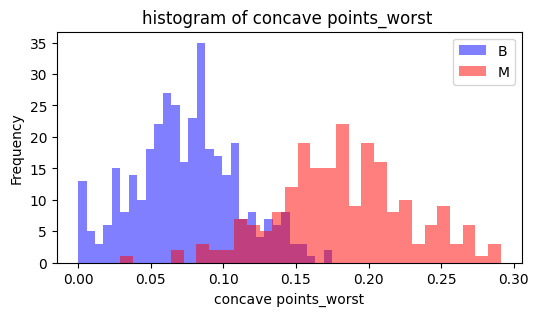

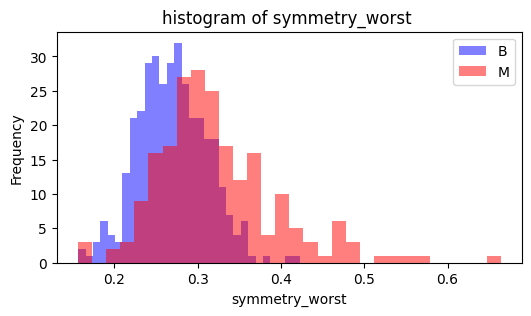

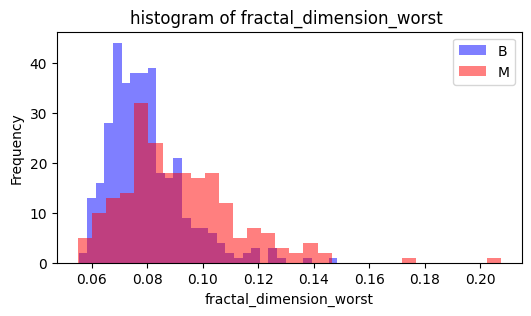

In [ ]:
b_diagnosis = df[df['diagnosis'] == 'B']
m_diagnosis = df[df['diagnosis'] == 'M']
for features in df.columns[1:]:
    plt.figure(figsize=(6, 3))
    plt.hist(b_diagnosis[features], bins=30, alpha=0.5, label='B', color='blue')
    plt.hist(m_diagnosis[features], bins=30, alpha=0.5, label='M', color='red')
    plt.title(f'histogram of {features} ')
    plt.xlabel(features)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

1. Некоторые признаки имеют бимодальное распределение, то есть два пика, соответствующих двум классам опухолей (признаки radius_mean, perimeter_mean, area_mean, concavity_mean, concave points_mean и т.д.)
  - Это означает, что эти признаки хорошо разделяют злокачественные и доброкачественные опухоли и могут быть полезны для классификации
2. Другие признаки имеют схожее распределение для обоих классов, что означает, что они менее информативны (признаки texture_mean, smoothness_mean, symmetry_mean и т.д.)

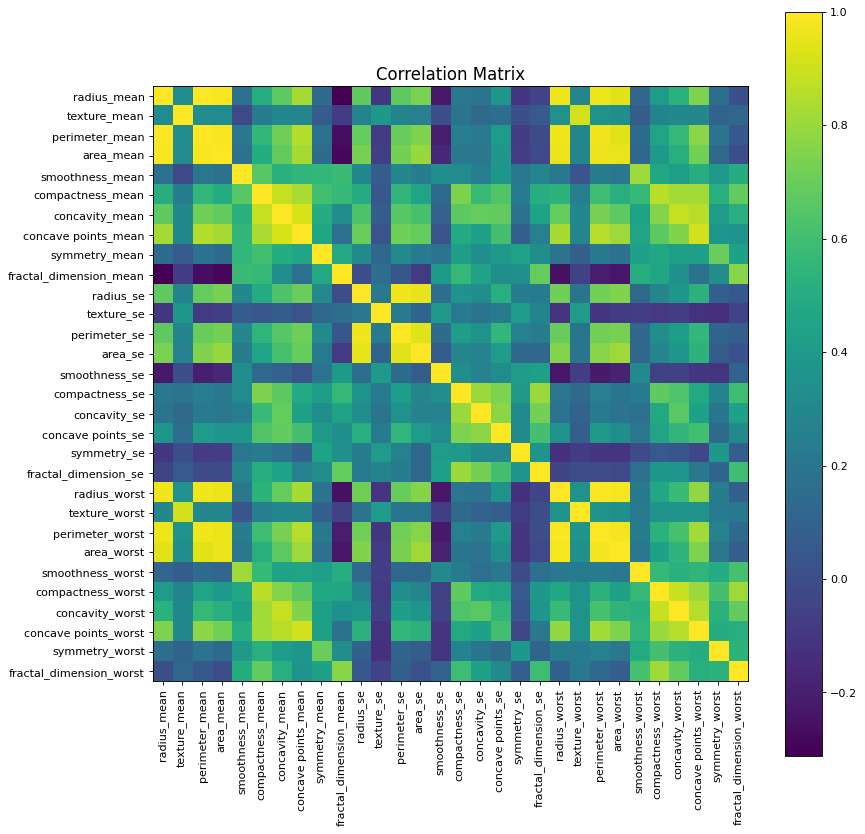

In [43]:
corr = df.corr()
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()


1. Есть много признаков, которые имеют высокую положительную корреляцию (> 0.9) между собой (признаки radius_mean, perimeter_mean и area_mean имеют корреляцию 0.99 друг с другом)
  - Это означает, что эти признаки почти линейно зависят друг от друга и несут избыточную информацию
2. Целевая переменная diagnosis имеет сильную отрицательную корреляцию с признаками, которые хорошо разделяли классы на гистограммах (признак concave points_mean имеет корреляцию -0.78 с diagnosis)
  - Это означает, что чем выше значение этого признака, тем больше вероятность, что опухоль злокачественная

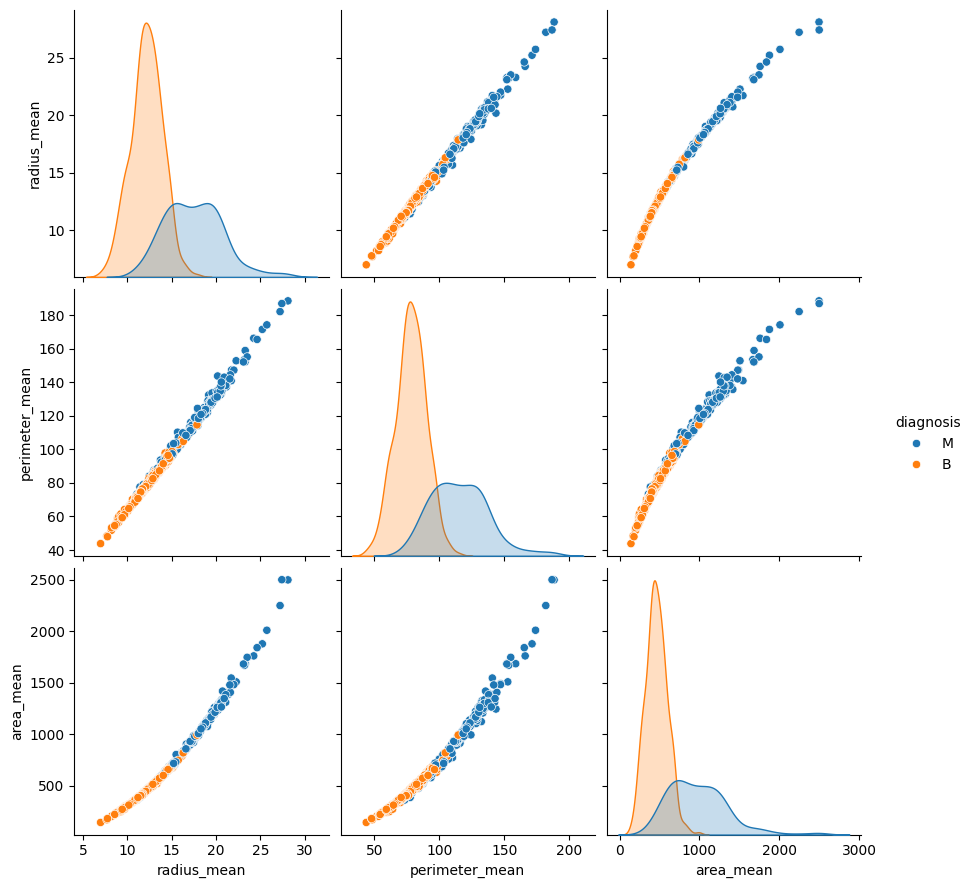

In [ ]:
sns.pairplot(df, vars=['radius_mean', 'perimeter_mean', 'area_mean'], hue='diagnosis', height=3, palette='tab10')
plt.show()


1. Для каждой пары признаков точки образуют прямую линию, что подтверждает линейную зависимость между ними
2. Злокачественные опухоли имеют более высокие значения этих признаков, чем доброкачественные, что согласуется с гистограммами и матрицей корреляций

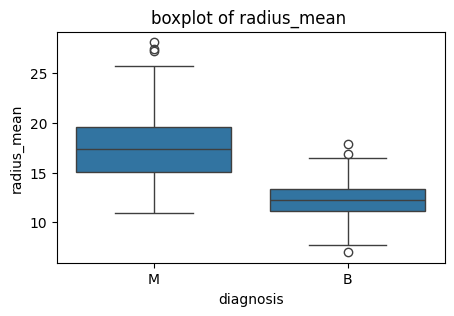

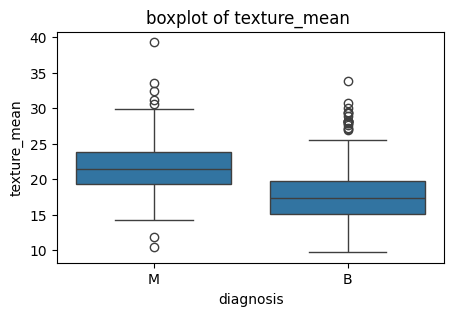

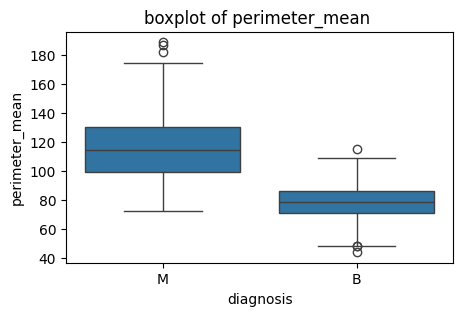

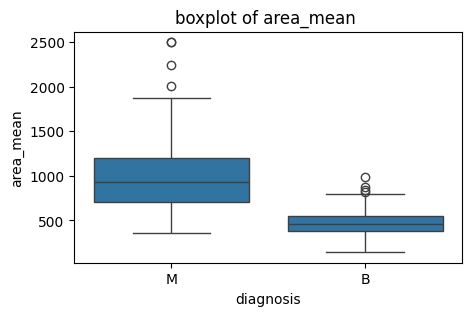

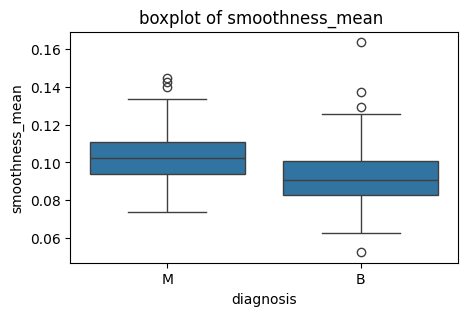

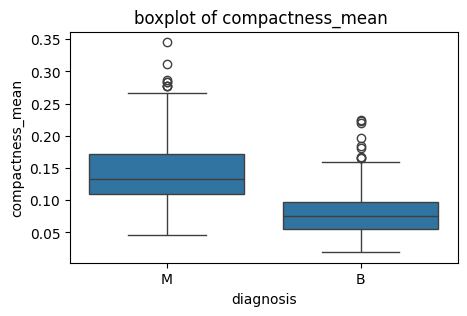

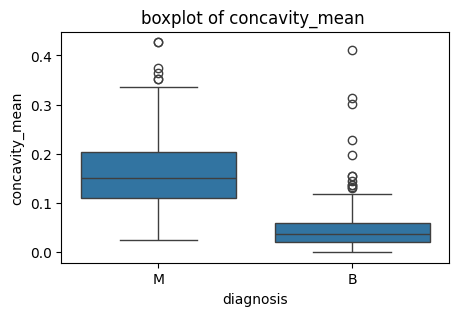

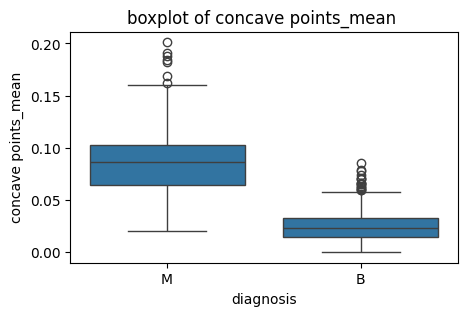

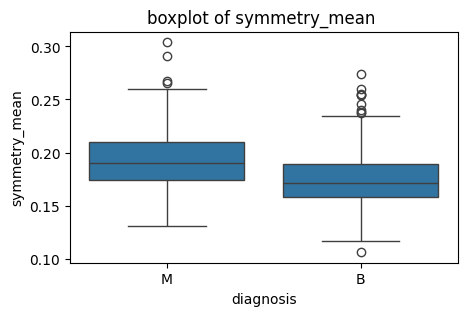

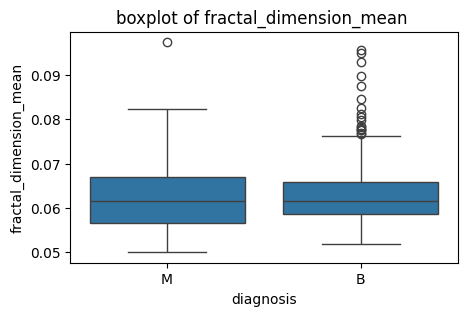

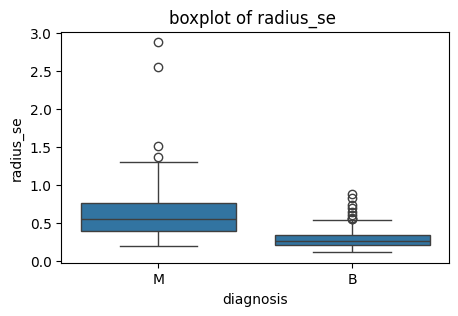

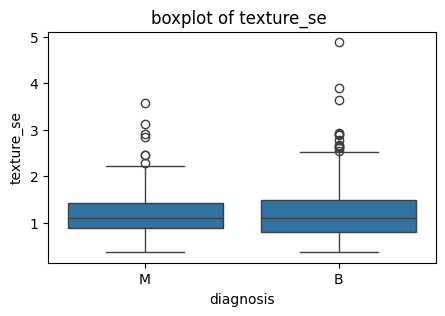

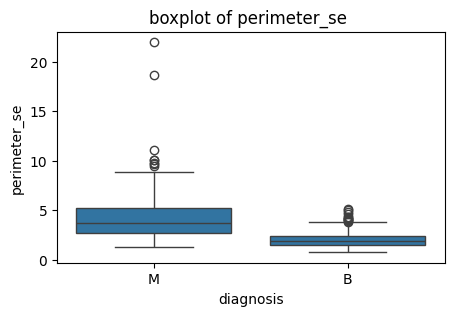

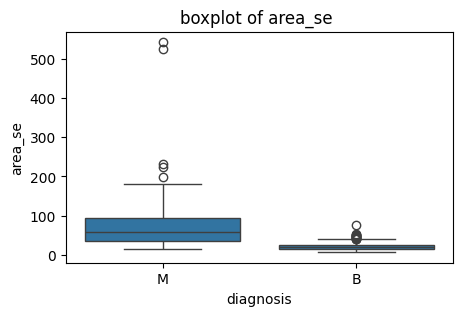

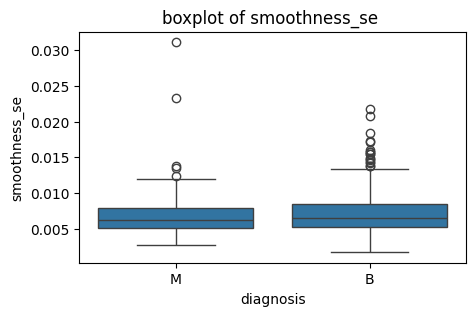

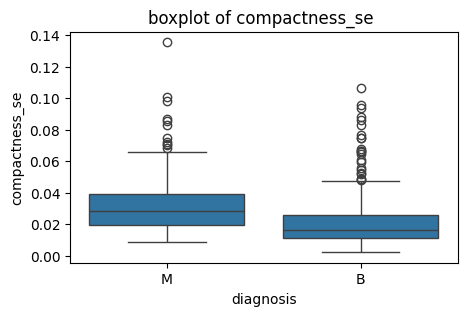

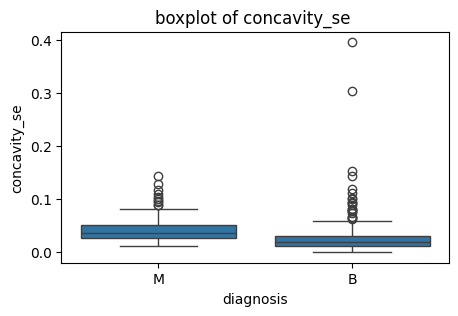

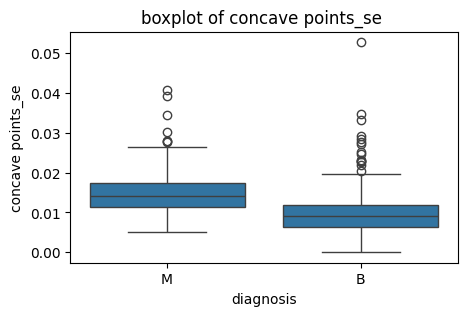

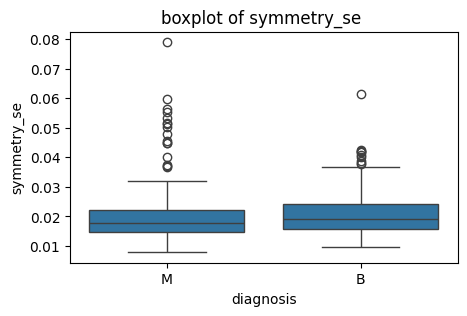

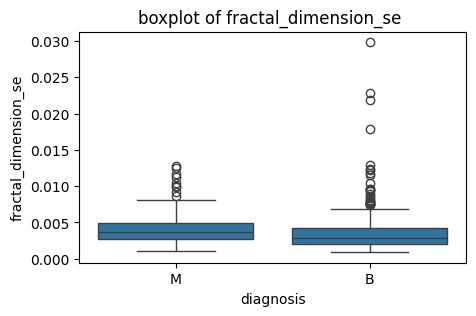

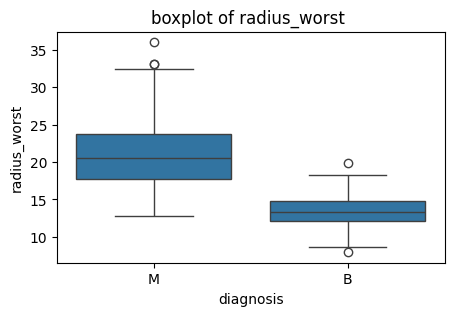

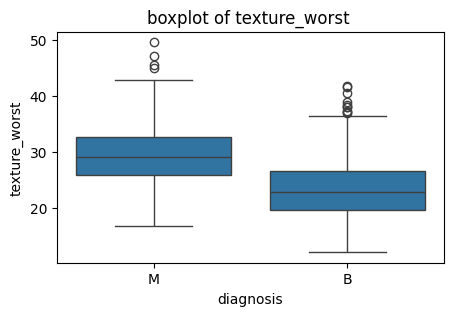

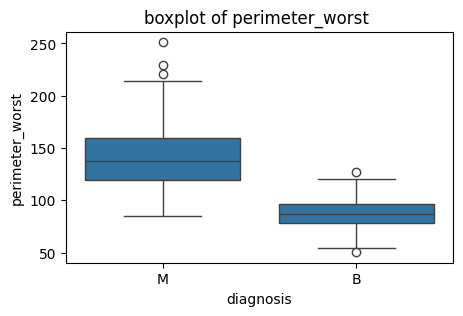

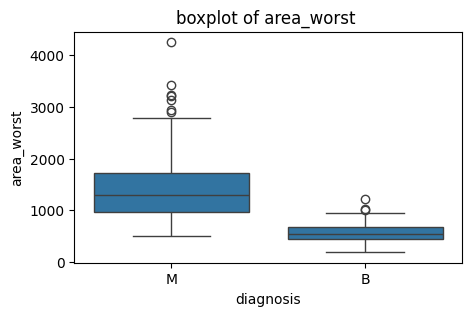

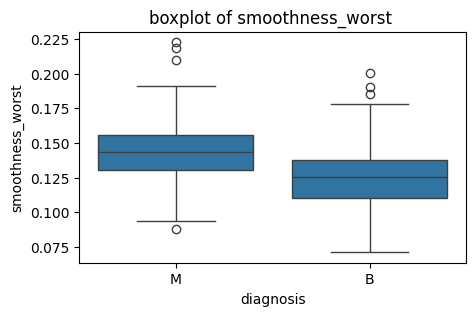

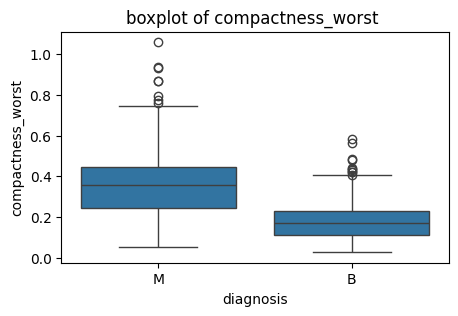

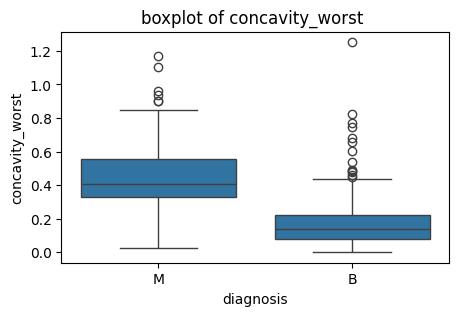

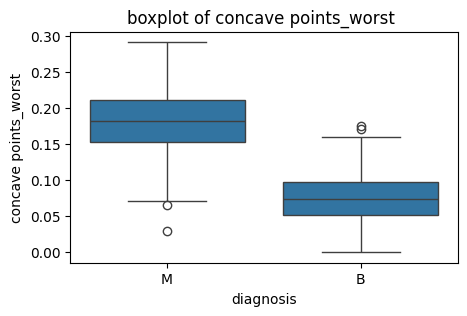

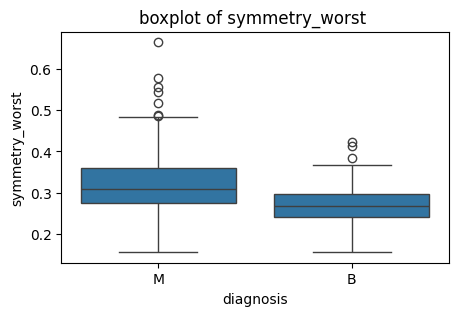

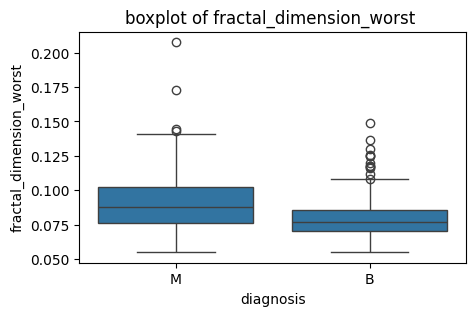

In [ ]:
for features in df.columns[1:]:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='diagnosis', y=features, data=df)
    plt.title(f'boxplot of {features} ')
    plt.xlabel('diagnosis')
    plt.ylabel(features)
    plt.show()

# kNN

---



In [80]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [126]:
def evaluate_model(y_test, y_pred, pos_label):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    print(f'Metrics: \n accuracy: {accuracy:.5f}\n precision: {precision:.5f}\n recall: {recall:.5f}\n f1: {f1:.5f}')
    return accuracy, precision, recall, f1

def plot_roc_curve(y_test, y_proba, label):
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='M')
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{label} AUC = {auc:.5f}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    return auc


def feature_importance(log_reg, X):
    coef = log_reg.coef_[0]
    plt.barh(X.columns, coef)
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.title('Importance')
    plt.show()

In [103]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Стандартизация нужна, потому что признаки имеют разный масштаб и диапазон значений, а значит у некоторых признаков будет больший вес в модели, чем у других

In [106]:
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

In [128]:
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred, pos_label='M')

Metrics: 
 accuracy: 0.95906
 precision: 0.95161
 recall: 0.93651
 f1: 0.94400


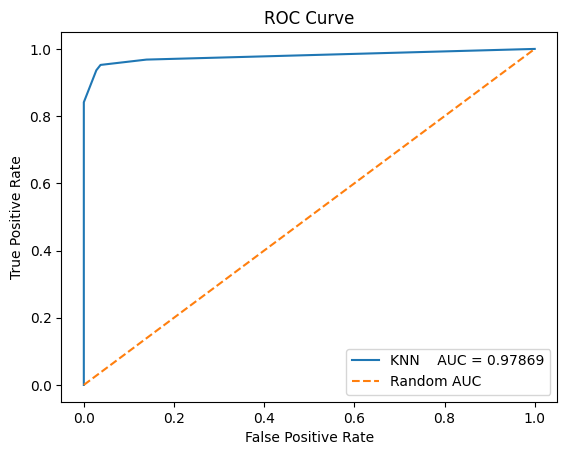

In [131]:
knn_auc = plot_roc_curve(y_test, knn.predict_proba(X_test_std)[:, 1], 'KNN   ')

In [109]:
params = {
    'n_neighbors': range(1, 21),
}
knn_grid = GridSearchCV(knn, params, cv=5, scoring='f1')
knn_grid.fit(X_train_std, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='f1')

In [110]:
knn_best = knn_grid.best_estimator_
print(f'Best parameters: {knn_grid.best_params_["n_neighbors"]}')

Best parameters: 1


In [125]:
knn_best_accuracy, knn_best_precision, knn_best_recall, knn_best_f1 = evaluate_model(y_test, knn_best.predict(X_test_std), pos_label='M')

Metrics: 
 accuracy: 0.95322
 precision: 0.95082
 recall: 0.92063
 f1: 0.93548


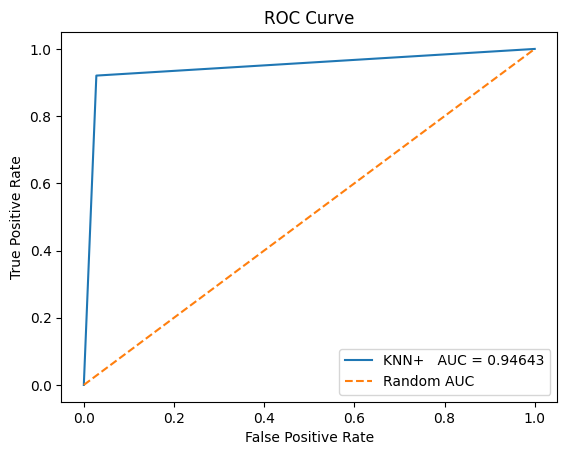

In [127]:
knn_best_auc = plot_roc_curve(y_test, knn_best.predict_proba(X_test_std)[:, 1], 'KNN+  ')

Настройка параметров улучшает качество модели:

In [134]:
print(f'Accuracy difference: {knn_best_accuracy - accuracy:.5f}')
print(f'Precision difference: {knn_best_precision - precision:.5f}')
print(f'Recall difference: {knn_best_recall - recall:.5f}')
print(f'F1 difference: {knn_best_f1 - f1:.5f}')
print(f'AUC difference: {knn_best_auc - knn_auc:.5f}')

Accuracy difference: -0.00585
Precision difference: -0.00079
Recall difference: -0.01587
F1 difference: -0.00852
AUC difference: -0.03226


# Log_reg

---



In [135]:
corr_m = corr.abs()
upper = corr_m.where(np.triu(np.ones(corr_m.shape), k=1).astype(bool))
del_data = [column for column in upper.columns if any(upper[column] > 0.85)]
df = df.drop(del_data, axis=1)
print(f'{df.shape[0]} rows, {df.shape[1]} columns')
df.sample(3)

569 rows, 18 columns


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
70,M,18.94,21.31,0.09009,0.10290,0.1582,0.05461,0.7888,0.7975,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,0.11930,0.2551,0.06589
397,B,12.80,17.46,0.08044,0.08895,0.1574,0.05750,0.3639,1.2650,0.005421,0.03477,0.04545,0.01384,0.01869,0.004067,0.09534,0.1988,0.07053
242,B,11.30,18.19,0.09592,0.13250,0.2054,0.07669,0.2428,1.6420,0.006663,0.05914,0.08880,0.01314,0.01995,0.008675,0.13470,0.3308,0.12970


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [139]:
accuracy_log, precision_log, recall_log, f1_log = evaluate_model(y_test, log_reg.predict(X_test), pos_label='M')

Metrics: 
 accuracy: 0.97076
 precision: 0.98333
 recall: 0.93651
 f1: 0.95935


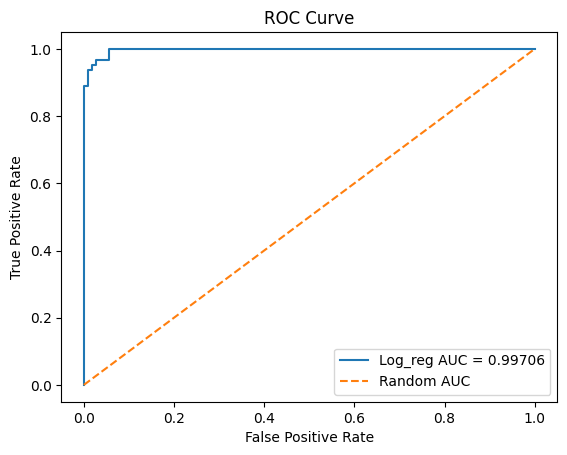

In [143]:
auc_log = plot_roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], 'Log_reg')

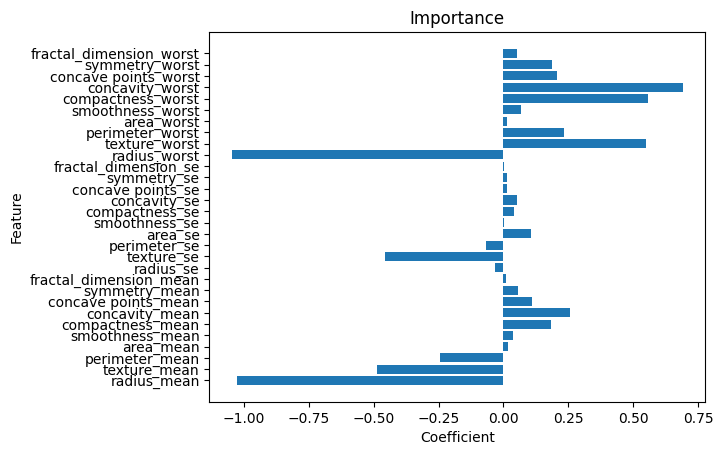

In [144]:
feature_importance(log_reg, X)

In [145]:
log_reg_cv = LogisticRegressionCV(cv=5,scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, scoring='roc_auc')

In [147]:
accuracy_log, precision_log, recall_log, f1_log = evaluate_model(y_test, log_reg_cv.predict(X_test), pos_label='M')

Metrics: 
 accuracy: 0.97076
 precision: 0.95312
 recall: 0.96825
 f1: 0.96063


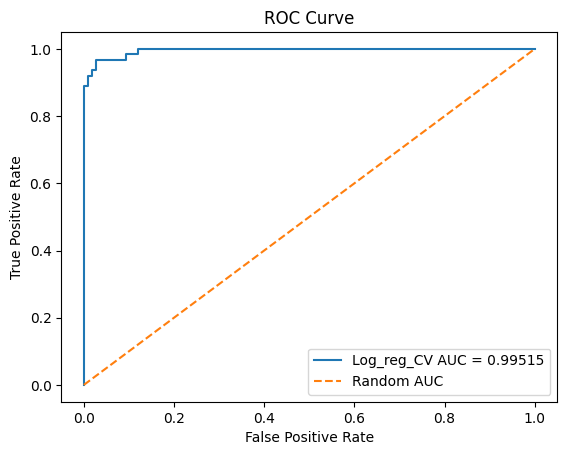

In [148]:
auc_log = plot_roc_curve(y_test, log_reg_cv.predict_proba(X_test)[:, 1], 'Log_reg_CV')

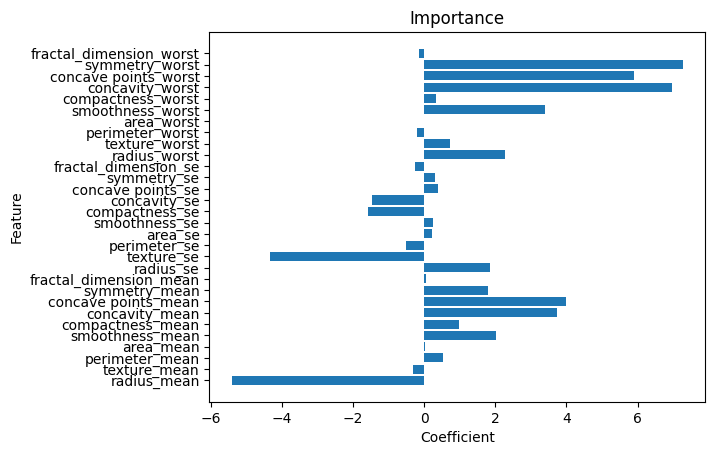

In [149]:
feature_importance(log_reg_cv, X)

1. Мы убрали лишние переменные, чтобы сделать данные проще и избавиться от
зависимости между ними.
2. Модель логистической регрессии работала хорошо, но мы ее улучшили, подобрав лучшее значение параметра C.
3. Модель логистической регрессии хорошо различает классы, как видно по ROC-кривой. Подбор параметра C сделал кривую еще лучше.
4. Мы посмотрели, какие признаки влияют на целевую переменную больше всего. Некоторые признаки повышают вероятность положительного класса, а некоторые - понижают. Подбор параметра C изменил некоторые влияния, чтобы модель не переобучалась.
5. Мы сравнили две модели, kNN и логистическую регрессию, и увидели, что логистическая регрессия лучше по всем показателям. Это может быть потому, что kNN зависит от того, как мы масштабируем признаки и сколько соседей выбираем, а логистическая регрессия более гибкая и понятная